# Introduction

In today's digital age, individuals are often overwhelmed by the sheer volume of available books. A book recommender system aims to alleviate this information overload by suggesting books that are likely to be of interest to a particular user. By analyzing user preferences, reading history, and book characteristics, these systems enhance the book discovery process, improve user engagement with online book platforms, and ultimately drive sales and readership. This project focuses on developing a book recommender system using three distinct datasets: books_df containing book information, ratings_df detailing user ratings, and user_df providing user demographics.

## Business Understanding

The development of an effective book recommender system holds significant value for various stakeholders:

- E-commerce Platforms and Online Bookstores: Recommender systems can drive sales by suggesting relevant books to customers, increasing the likelihood of purchases. They also enhance user experience, leading to greater customer satisfaction and loyalty.

* Libraries and Educational Institutions: These systems can help patrons discover new titles aligned with their interests or academic needs, fostering a more engaging and enriching experience.


+ Publishers and Authors: Understanding user preferences can provide valuable insights into market trends, potentially influencing publishing decisions and marketing strategies.

* Individual Users: The primary benefit for users is the ability to effortlessly discover books they are likely to enjoy, saving time and expanding their literary horizons.

By leveraging the data within the provided datasets, this project aims to build a system that accurately predicts user preferences and delivers personalized book recommendations, thereby addressing a crucial need in the book discovery ecosystem.

## Problem Statement

The core problem this project seeks to address is the challenge users face in discovering books that align with their individual tastes from a vast and ever-expanding catalog. Without an effective recommendation system, users may struggle to find new authors, genres, or titles they would enjoy, potentially leading to a less engaging and fulfilling reading experience. This project aims to develop a data-driven solution that can predict user preferences based on their past interactions and the characteristics of books, thereby providing personalized and relevant recommendations.

## Objectives

The primary objectives of this project are to:

* Develop a book recommender system: Implement one or more recommendation algorithms (e.g., collaborative filtering, content-based filtering, or hybrid approaches).

* Evaluate the performance of the recommender system: Use appropriate metrics to assess the accuracy and effectiveness of the developed model(s).

* Provide actionable insights: Based on the analysis and model results, offer insights into user preferences and potential strategies for book recommendations.

## Data Limitations

Before embarking on this project, it's important to consider potential limitations of the data:

* Data Sparsity: The ratings_df might suffer from sparsity, meaning that most users have only rated a small fraction of the available books. This can pose challenges for collaborative filtering techniques.

* Cold Start Problem: New users or new books with no or very few ratings will be difficult to recommend using collaborative filtering.

* Data Bias: The data might reflect biases present in the user base or the book catalog. For example, certain genres or authors might be over-represented.

* Data Quality: The datasets might contain inconsistencies, errors, or missing values that need to be addressed during preprocessing.

* Implicit vs. Explicit Feedback: The ratings_df likely contains explicit feedback (numerical ratings). However, other forms of implicit feedback (e.g., browsing history, purchase history) might not be available, potentially limiting the richness of user preference data.

* Evolution of Preferences: User preferences can change over time, which might not be captured effectively by static datasets.


# Data Understanding

### Loading Data

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
books_df = pd.read_csv(
    '../books_df.csv',
    sep=';',                   # Semicolon separator
    quotechar='"',             # Handles quoted text properly
    encoding='latin1',         # Supports special characters
    on_bad_lines='skip',        # Skips problematic lines
    engine='python'  # Use python engine for more flexibility
)

ratings_df = pd.read_csv(
    '../ratings_df.csv',
    sep=';',                   # Semicolon separator
    quotechar='"',             # Handles quoted text properly
    encoding='latin1',         # Supports special characters
    on_bad_lines='skip',        # Skips problematic lines
    engine='python'  # Use python engine for more flexibility
)

user_df = pd.read_csv(
    '../user_df.csv',
    sep=';',                   # Semicolon separator
    quotechar='"',             # Handles quoted text properly
    encoding='latin1',         # Supports special characters
    on_bad_lines='skip',        # Skips problematic lines
    engine='python'  # Use python engine for more flexibility
)

In [3]:
books_df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [4]:
#summary of dataframe
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270491 entries, 0 to 270490
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 270491 non-null  object
 1   Book-Title           270491 non-null  object
 2   Book-Author          270489 non-null  object
 3   Year-Of-Publication  270491 non-null  int64 
 4   Publisher            270489 non-null  object
 5   Image-URL-S          270491 non-null  object
 6   Image-URL-M          270491 non-null  object
 7   Image-URL-L          270491 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.5+ MB


In [5]:
# check dataframe dimension
books_df.shape

(270491, 8)

In [6]:
ratings_df.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [7]:
#summary of dataframe
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149766 entries, 0 to 1149765
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149766 non-null  int64 
 1   ISBN         1149766 non-null  object
 2   Book-Rating  1149766 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [8]:
# check dataframe dimension
ratings_df.shape

(1149766, 3)

In [9]:
user_df.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [10]:
#summary of dataframe
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278177 entries, 0 to 278176
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278177 non-null  int64  
 1   Location  278177 non-null  object 
 2   Age       167669 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
# check dataframe dimension
user_df.shape

(278177, 3)

## Data Cleaning

In [12]:
# List of dataframes with names for clarity
dfs = [("Books", books_df), ("Ratings", ratings_df), ("Users", user_df)]

# Loop through and check missing values
for name, df in dfs:
    print(f"\nMissing values in {name} dataset:")
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(missing)
    else:
        print("No missing values.")



Missing values in Books dataset:
Book-Author    2
Publisher      2
dtype: int64

Missing values in Ratings dataset:
No missing values.

Missing values in Users dataset:
Age    110508
dtype: int64


* Books dataset has missing values in Book-Author and Publisher. 
* Users dataset has missing values in Age.



## Handling missing values

We will drop the missing values in books dataset because the number is insignificant.

In [13]:
#Dropping missin values of Books data as they are negligible
books_df.dropna(inplace=True)

In [14]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [15]:
#Fill missing Values in Age Column with Median
user_df['Age'] =user_df['Age'].fillna(user_df['Age'].median())

In [16]:
user_df.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [17]:
#check summary statistics
user_df['Age'].describe()

count    278177.000000
mean         33.658624
std          11.284321
min           0.000000
25%          29.000000
50%          32.000000
75%          35.000000
max         244.000000
Name: Age, dtype: float64

Minimum age 0 and max age 244 indicates outliers exist in age

In [18]:
#Capping the outlier rows with Percentiles
upper_lim = user_df['Age'].quantile(.95)
lower_lim = user_df['Age'].quantile(.05)
user_df.loc[(user_df["Age"] > upper_lim),"Age"] = upper_lim
user_df.loc[(user_df["Age"] < lower_lim),"Age"] = lower_lim
     

In [19]:
#recheck age summary
user_df['Age'].describe()

count    278177.000000
mean         33.402449
std           9.522502
min          18.000000
25%          29.000000
50%          32.000000
75%          35.000000
max          56.000000
Name: Age, dtype: float64

### Checking for duplicates

In [20]:

# Loop through and check for duplicate rows
for name, df in dfs:
    duplicates = df.duplicated().sum()
    print(f"{name} dataset has {duplicates} duplicate rows.")


Books dataset has 0 duplicate rows.
Ratings dataset has 0 duplicate rows.
Users dataset has 0 duplicate rows.


Drop unnecessary column in books dataset

In [21]:
# Drop image URLs columns
books_df = books_df.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])


In [22]:
books_df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [23]:
books_df.shape

(270487, 5)

## Merging the datasets

Merging user and ratings dataset on User-ID column.

In [24]:
#Merging users and rating dataframe
user_ratings_df=pd.merge(user_df,ratings_df, on='User-ID')
     

In [25]:
user_ratings_df.shape

(1149558, 5)

Merging combined data of user and ratings with books data on ISBN column

In [26]:
#Merging both data
merged_df=pd.merge(books_df,user_ratings_df, on='ISBN')

In [27]:
#head of all 3 merged dataframe
merged_df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,5


In [28]:
# check summary
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028622 entries, 0 to 1028621
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1028622 non-null  object 
 1   Book-Title           1028622 non-null  object 
 2   Book-Author          1028622 non-null  object 
 3   Year-Of-Publication  1028622 non-null  int64  
 4   Publisher            1028622 non-null  object 
 5   User-ID              1028622 non-null  int64  
 6   Location             1028622 non-null  object 
 7   Age                  1028622 non-null  float64
 8   Book-Rating          1028622 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 70.6+ MB


In [29]:
merged_df.shape

(1028622, 9)

In [30]:
#Country value counts
merged_df.Location.value_counts()
     

Location
toronto, ontario, canada            14738
n/a, n/a, n/a                       11135
chicago, illinois, usa               8481
seattle, washington, usa             8377
ottawa, ontario, canada              8096
                                    ...  
mitcham, ,                              1
norwood, north carolina, usa            1
vitoria, país vasco, spain              1
shenley, england, united kingdom        1
linclon, nebraska, usa                  1
Name: count, Length: 22403, dtype: int64

Split location into components: City, State, Country. This helps normalize and allows country-based filtering.

In [31]:
# Split 'Location' column into three new columns
merged_df[['City', 'State', 'Country']] = merged_df['Location'].str.split(',', n=2, expand=True)

# Clean up whitespace
merged_df['City'] = merged_df['City'].str.strip()
merged_df['State'] = merged_df['State'].str.strip()
merged_df['Country'] = merged_df['Country'].str.strip()

# Replace 'n/a'  with 'Unknown'
merged_df[['City', 'State', 'Country']] = merged_df[['City', 'State', 'Country']].replace(['n/a', 'N/A', 'na', 'NA'], 'Unknown')
merged_df[['City', 'State', 'Country']] = merged_df[['City', 'State', 'Country']].fillna('Unknown')

# Optional: Check result
merged_df[['Location', 'City', 'State', 'Country']].head()


,Location,City,State,Country
0,"stockton, california, usa",stockton,california,usa
1,"timmins, ontario, canada",timmins,ontario,canada
2,"ottawa, ontario, canada",ottawa,ontario,canada
3,"n/a, n/a, n/a",Unknown,Unknown,Unknown
4,"sudbury, ontario, canada",sudbury,ontario,canada


In [32]:
# Drop the 'Location' column
merged_df.drop(columns=['Location'], inplace=True)




In [33]:
# display dataframe
merged_df.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Age,Book-Rating,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,18.0,0,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,32.0,5,timmins,ontario,canada
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,49.0,0,ottawa,ontario,canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,32.0,8,Unknown,Unknown,Unknown
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,32.0,0,sudbury,ontario,canada
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,30.0,8,toronto,ontario,canada
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,85526,36.0,0,victoria,british columbia,canada
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,96054,29.0,0,ottawa,ontario,canada
8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,32.0,9,ottawa,,
9,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,32.0,9,kingston,ontario,canada


In [34]:
# getting unique value from 'year_of_publication' feature

merged_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [35]:
# Remove rows with Year-Of-Publication as 0
merged_df = merged_df[merged_df['Year-Of-Publication'] != 0]

# Optional: Reset index after deletion
merged_df.reset_index(drop=True, inplace=True)

# Check if 0 is gone
print(merged_df['Year-Of-Publication'].unique())


[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 2012 2006 1909 2008 1378 1919 1922 1897
 2024 1376 2037]


## Exploratory Data Analysis

### Univariate Analysis

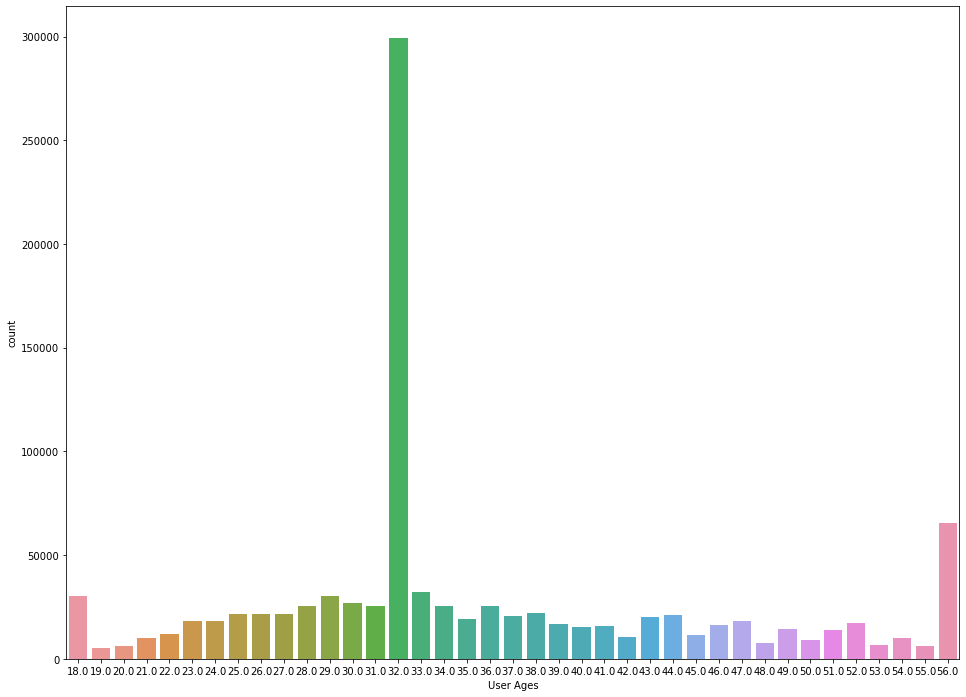

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
sns.countplot(x=merged_df['Age'])
plt.xlabel('User Ages')
plt.show()

Summary

The graph shows a very uneven age distribution with a massive concentration at age 32. 

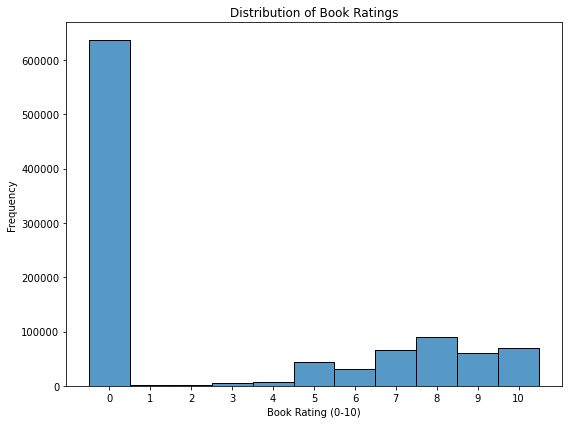

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['Book-Rating'], bins=11, discrete=True, kde=False)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating (0-10)')
plt.ylabel('Frequency')
plt.xticks(range(0, 11))
plt.tight_layout()
plt.show()

### Observation

This indicates that a vast majority of the ratings in the dataset are 0 which can translate to Users disliked the book or Users interacted with the book but chose not to rate it. There are noticeable, though much smaller, peaks at higher ratings, particularly around 7, 8, 9, and 10. This suggests that while most ratings are 0, there's also a considerable number of books that have received positive feedback.

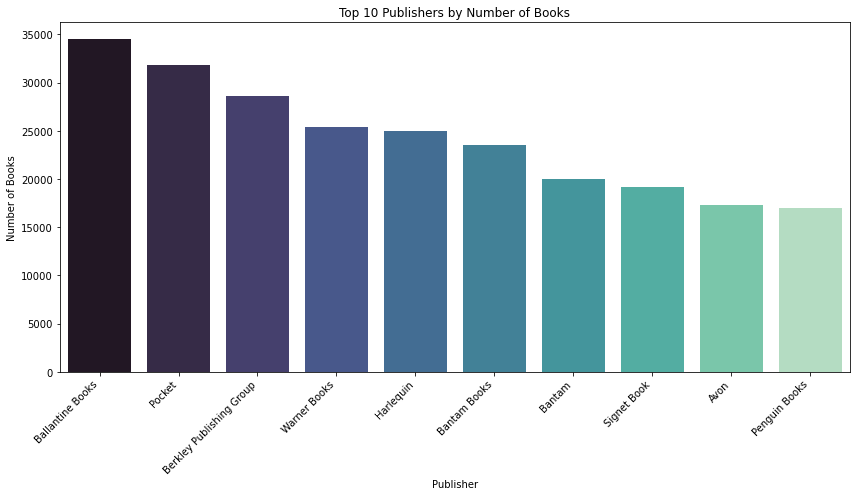

In [39]:
# Get the top 10 publishers by count
top_10_publishers = merged_df['Publisher'].value_counts().nlargest(10)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_publishers.index, y=top_10_publishers.values, palette='mako')
plt.title('Top 10 Publishers by Number of Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observation

Ballantine Books has the highest number of books by a significant margin. This suggests that the publisher has realesed many books in the market

### Bivariate Analysis

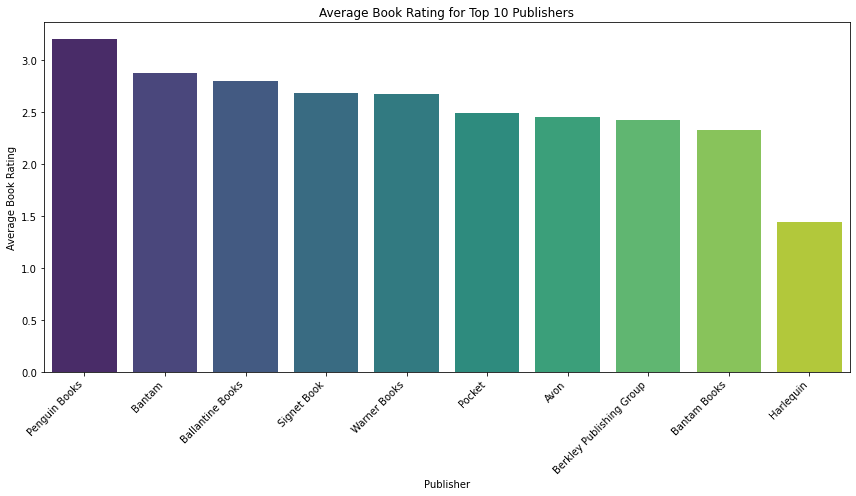

In [40]:
# Get the top 10 publishers by count
top_10_publishers = merged_df['Publisher'].value_counts().nlargest(10).index

# Filter the DataFrame to include only books from the top 10 publishers
top_publishers_df = merged_df[merged_df['Publisher'].isin(top_10_publishers)]

# Group by publisher and calculate the average book rating
average_ratings = top_publishers_df.groupby('Publisher')['Book-Rating'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=average_ratings.index, y=average_ratings.values, palette='viridis')
plt.title('Average Book Rating for Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Average Book Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observation

Books published by Penguin Books have received the highest ratings from users. Some publishers in the middle of the ranking have average ratings that are quite close to each other (e.g., Bantam, Ballantine Books, Signet Book, Warner Books, Pocket, Avon). This suggests that, on average, user satisfaction with books from these publishers is somewhat similar.

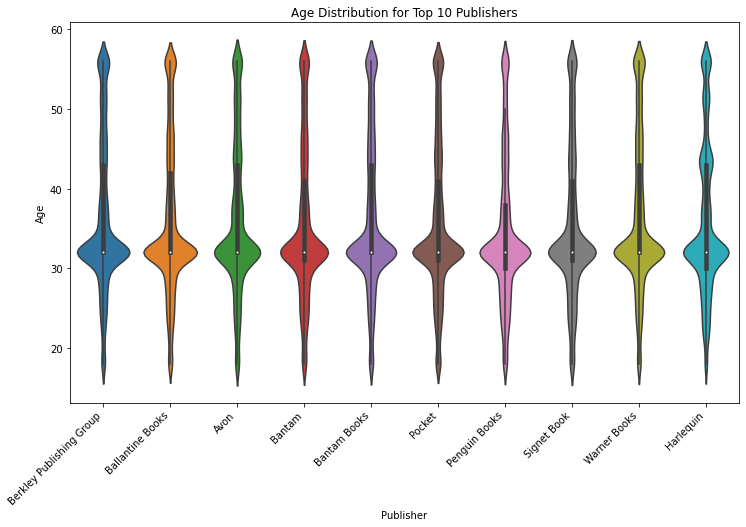

In [42]:
# Age vs. top 10 Publisher
top_n = 10
top_publishers = merged_df['Publisher'].value_counts().nlargest(top_n).index
filtered_df = merged_df[merged_df['Publisher'].isin(top_publishers)]

plt.figure(figsize=(12, 7))
sns.violinplot(x='Publisher', y='Age', data=filtered_df)
plt.title(f'Age Distribution for Top {top_n} Publishers')
plt.xlabel('Publisher')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.show()

### Observation

The graph reveals that different publishers appear to attract readers of varying age distributions. Some publishers (e.g., Berkley Publishing Group, Ballantine Books, Avon) seem to have a relatively wider age range of readers, suggesting their catalog might appeal to a broader demographic.

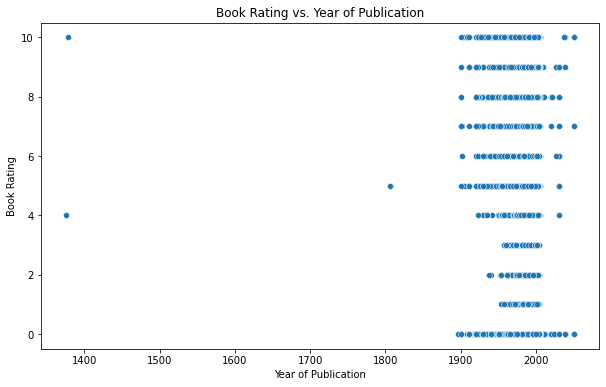

In [43]:
# Year of Publication vs. Book Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year-Of-Publication', y='Book-Rating', data=merged_df)
plt.title('Book Rating vs. Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Book Rating')
plt.show()

### Observation
There are very few data points for books published before the 1900s. This indicates a scarcity of ratings for older titles in your dataset.  This data will likely struggle to provide accurate recommendations for very old books due to the lack of rating information. This is a classic "cold start" problem. 



## Data Pre-processing

In [46]:
merged_df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Age,Book-Rating,City,State,Country
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,32.0,5,timmins,ontario,canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,32.0,8,Unknown,Unknown,Unknown


We drop '0' rating rows because it does not explicitly mean the reader disliked the book. Also By focusing on explicit positive ratings, the model can better distinguish between items that users liked and those they didn't 

In [47]:
# Drop rows where the 'Book-Rating' column is equal to 0
merged_df.drop(merged_df[merged_df['Book-Rating'] == 0].index, inplace=True)


In [48]:
# Display the first few rows of the updated DataFrame
merged_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Age,Book-Rating,City,State,Country
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,32.0,5,timmins,ontario,canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,32.0,8,Unknown,Unknown,Unknown
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,30.0,8,toronto,ontario,canada
8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,32.0,9,ottawa,,
9,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,32.0,9,kingston,ontario,canada
